In [1]:
from wise_light_curves.wise_light_curves import *
import matplotlib.pyplot as plt
from matplotlib.patches import Rectangle 
from matplotlib.patches import ConnectionPatch
import matplotlib.ticker as tick
from astropy.io import ascii
import numpy as np
import pandas as pd
import os
import scipy
from Potato import plotparams
from astropy.timeseries import LombScargle as ls
from astropy import units as u
from astropy.coordinates import SkyCoord
from astropy.time import Time
from astropy import constants as const

In [2]:
colors = ["#6b8bcd", "#b3b540", "#8f62ca", "#5eb550", "#c75d9c", "#4bb092", "#c5562f", "#6c7f39", 
              "#ce5761", "#c68c45", '#b5b246', '#d77fcc', '#7362cf', '#ce443f', '#3fc1bf', '#cda735',
              '#a1b055']

In [3]:
df1 = pd.read_csv('Updated_LC_data/17179977928.csv')
df1 = df1.loc[df1.Mag < 14].reset_index(drop=True)
dfg1 = df1.loc[df1.Filter == 'g'].reset_index(drop=True)
dfv1 = df1.loc[df1.Filter == 'V'].reset_index(drop=True)

dfg1['Mag'] = dfg1['Mag'].astype(float)
dfg1['JD'] = dfg1['JD'].astype(float)

meanmag1 = sum(dfg1.Mag) / len(dfg1.Mag)

dfg_mag_avg1 = [i - meanmag1 for i in dfg1.Mag]

peaks1 = scipy.signal.find_peaks(dfg_mag_avg1, prominence=0.17, distance=25, height=0.3, width=2) 

peak1 = peaks1[0]

peak1 = [int(i) for i in peak1]

peak1 = pd.Series(peak1)

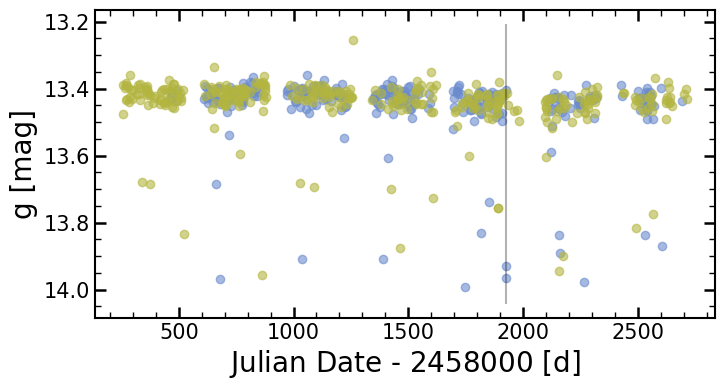

In [4]:
fig, ax = plt.subplots(1, 1, figsize=(8, 4))
ax = plotparams(ax)

cams = dfg1["Camera"]
camtype = np.unique(cams)
camnum = len(camtype)
    
camdf = pd.DataFrame()

for i in range(0,camnum):
    camdf = dfg1.loc[dfg1["Camera"] == camtype[i]].reset_index(drop=True)
    camjd = camdf["JD"] - (2.458 * 10 **6)
    cammag = camdf['Mag']
    ax.scatter(camjd, cammag, color = colors[i], alpha = 0.6)

for i in range(len(peak1)):
    ax.vlines((dfg1.JD[peak1[i]] - (2.458 * 10**6)), (min(dfg1['Mag']-0.05)), (max(dfg1['Mag'])+0.05), "k", alpha=0.3)

ax.invert_yaxis() 
ax.set_xlabel('Julian Date - $2458000$ [d]', fontsize=20)
ax.set_ylabel('g [mag]', fontsize=20)
plt.show() 

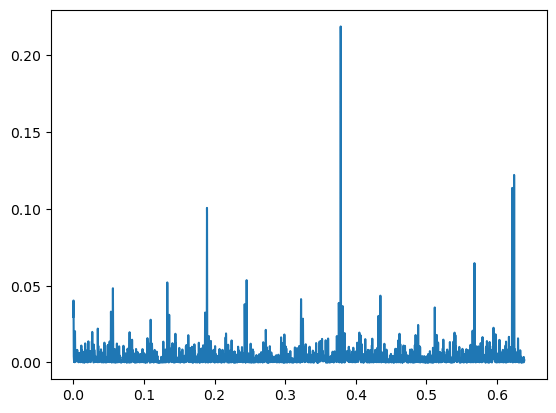

In [5]:
freq1, power1 = ls(dfg1["JD"], dfg1["Mag"]).autopower()
plt.plot(freq1, power1)

In [6]:
j1 = freq1[np.argmax(power1)]
t1 = (1 / j1) *2
print('frequency:',j1)
print('period:', t1)


dfg1["OrbNum"] = dfg1["JD"] / t1
dfg1["Phase"] = dfg1["OrbNum"] % 1
dfg1.head(10)

frequency: 0.37859983618611304
period: 5.282622465311461


,JD,Flux,Flux Error,Mag,Mag Error,Limit,FWHM,Filter,Quality,Camera,OrbNum,Phase
0,2.458257e+06,16.0012,0.1773,13.3897,0.0120,16.5308,2.11,g,G,bs,465347.841057,0.841057
1,2.458259e+06,14.7714,0.0956,13.4765,0.0070,17.2015,2.45,g,G,bs,465348.218674,0.218674
2,2.458266e+06,15.8635,0.0646,13.3991,0.0044,17.6264,1.50,g,B,bs,465349.542813,0.542813
3,2.458270e+06,15.9882,0.0892,13.3906,0.0061,17.2769,1.45,g,G,bs,465350.297757,0.297757
4,2.458271e+06,16.0995,0.1134,13.3830,0.0077,17.0159,1.42,g,G,bs,465350.486479,0.486479
5,2.458272e+06,15.3528,0.0749,13.4346,0.0053,17.4666,1.44,g,G,bs,465350.676515,0.676515
6,2.458274e+06,15.4078,0.0886,13.4307,0.0063,17.2834,1.64,g,B,bs,465351.055386,0.055386
7,2.458278e+06,15.9080,0.0689,13.3960,0.0047,17.5572,1.56,g,G,bs,465351.808541,0.808541
8,2.458282e+06,15.2736,0.0279,13.4402,0.0020,18.5393,1.49,g,G,bs,465352.563134,0.563134
9,2.458288e+06,15.4743,0.0334,13.4260,0.0023,18.3435,2.03,g,G,bs,465353.700162,0.700162


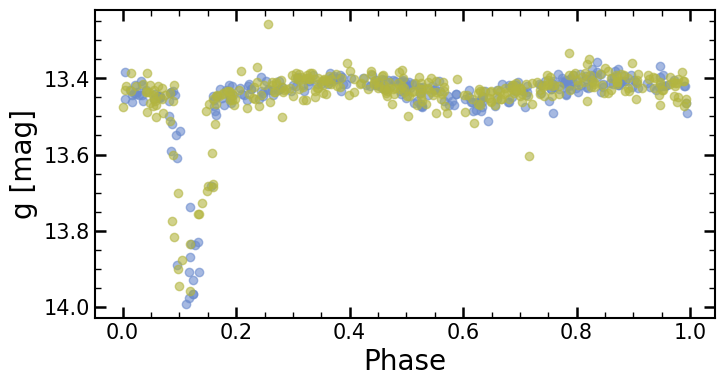

In [7]:
fig, ax = plt.subplots(1, 1, figsize=(8, 4))
ax = plotparams(ax)

cams = dfg1["Camera"]
camtype = np.unique(cams)
camnum = len(camtype)
    
camdf = pd.DataFrame()

for i in range(0,camnum):
    camdf = dfg1.loc[dfg1["Camera"] == camtype[i]].reset_index(drop=True)
    camphase = camdf["Phase"]
    cammag = camdf['Mag']
    ax.scatter(camphase, cammag, color = colors[i], alpha = 0.6)

ax.invert_yaxis() 
ax.set_xlabel('Phase', fontsize=20)
ax.set_ylabel('g [mag]', fontsize=20)
plt.show() 

In [8]:
df2 = pd.read_csv('Updated_LC_data/300649015906.csv')
dfg2 = df2.loc[df2.Filter == 'g'].reset_index(drop=True)
dfv2 = df2.loc[df2.Filter == 'V'].reset_index(drop=True)

dfg2['Mag'] = dfg2['Mag'].astype(float)
dfg2['JD'] = dfg2['JD'].astype(float)

meanmag2 = sum(dfg2.Mag) / len(dfg2.Mag)

dfg_mag_avg2 = [i - meanmag2 for i in dfg2.Mag]

peaks2 = scipy.signal.find_peaks(dfg_mag_avg2, prominence=0.17, distance=25, height=0.3, width=2) 

peak2 = peaks2[0]

peak2 = [int(i) for i in peak2]

peak2 = pd.Series(peak2)

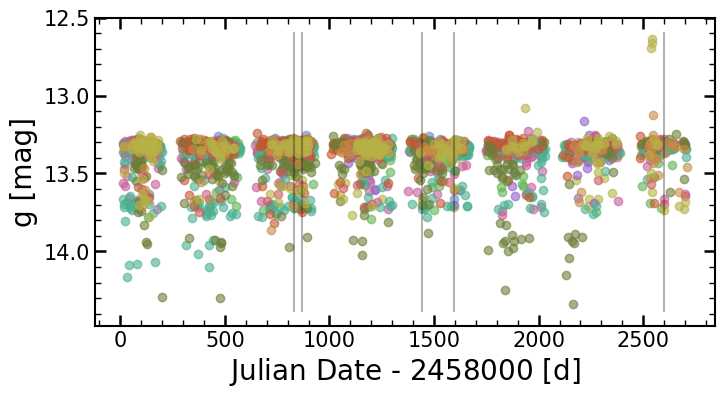

In [9]:
fig, ax = plt.subplots(1, 1, figsize=(8, 4))
ax = plotparams(ax)

cams = dfg2["Camera"]
camtype = np.unique(cams)
camnum = len(camtype)
    
camdf = pd.DataFrame()

for i in range(0,camnum):
    camdf = dfg2.loc[dfg2["Camera"] == camtype[i]].reset_index(drop=True)
    camjd = camdf["JD"] - (2.458 * 10 **6)
    cammag = camdf['Mag']
    ax.scatter(camjd, cammag, color = colors[i], alpha = 0.6)

for i in range(len(peak2)):
    ax.vlines((dfg2.JD[peak2[i]] - (2.458 * 10**6)), (min(dfg2['Mag']-0.05)), (max(dfg2['Mag'])+0.05), "k", alpha=0.3)

ax.invert_yaxis() 
ax.set_xlabel('Julian Date - $2458000$ [d]', fontsize=20)
ax.set_ylabel('g [mag]', fontsize=20)
plt.show() 

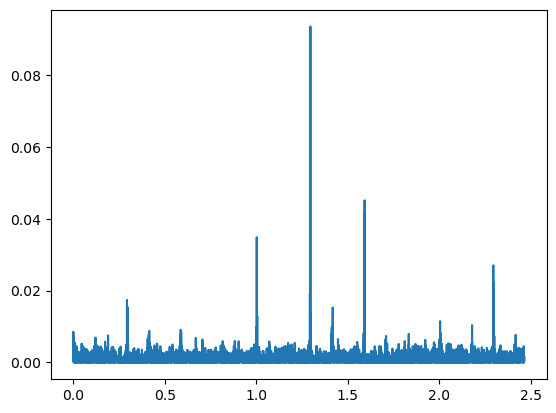

In [10]:
freq2, power2 = ls(dfg2["JD"], dfg2["Mag"]).autopower()
plt.plot(freq2, power2)

In [11]:
j2 = freq2[np.argmax(power2)]
t2 = (1 / j2) *2
print('frequency:',j2)
print('period:', t2)


dfg2["OrbNum"] = dfg2["JD"] / t2
dfg2["Phase"] = dfg2["OrbNum"] % 1
dfg2.head(10)

frequency: 1.2963050955456652
period: 1.5428466700257182


,JD,Flux,Flux Error,Mag,Mag Error,Limit,FWHM,Filter,Quality,Camera,OrbNum,Phase
0,2.458013e+06,16.4313,0.0228,13.3609,0.0015,18.7586,1.99,g,G,bl,1.593167e+06,0.302852
1,2.458014e+06,12.4568,0.0832,13.6615,0.0073,17.3519,1.64,g,G,bl,1.593168e+06,0.951272
2,2.458014e+06,13.6319,0.0815,13.5637,0.0065,17.3750,1.48,g,G,bk,1.593168e+06,0.953663
3,2.458015e+06,17.1644,0.0662,13.3135,0.0042,17.6011,1.65,g,G,bl,1.593169e+06,0.594897
4,2.458015e+06,17.2712,0.0560,13.3068,0.0035,17.7827,1.53,g,G,bk,1.593169e+06,0.597136
5,2.458016e+06,17.2222,0.0498,13.3098,0.0031,17.9101,1.57,g,G,bk,1.593169e+06,0.238614
6,2.458016e+06,12.0696,0.0525,13.6958,0.0047,17.8519,1.53,g,G,bl,1.593169e+06,0.241033
7,2.458017e+06,16.9590,0.0517,13.3266,0.0033,17.8691,1.68,g,G,bl,1.593170e+06,0.885782
8,2.458017e+06,17.2253,0.0752,13.3097,0.0047,17.4616,2.42,g,G,bk,1.593170e+06,0.888163
9,2.458018e+06,17.1481,0.0408,13.3145,0.0026,18.1258,1.42,g,G,br,1.593171e+06,0.603806


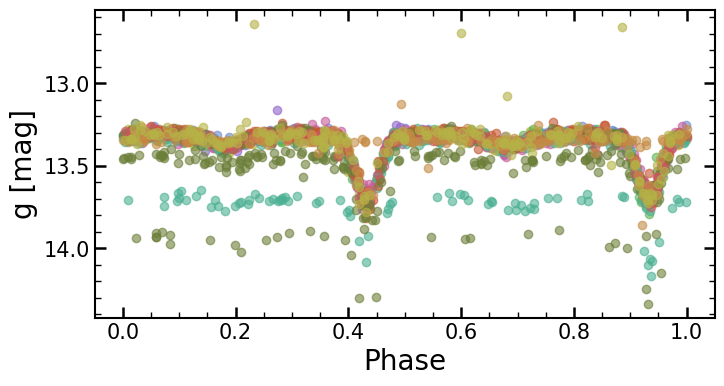

In [12]:
fig, ax = plt.subplots(1, 1, figsize=(8, 4))
ax = plotparams(ax)

cams = dfg2["Camera"]
camtype = np.unique(cams)
camnum = len(camtype)
    
camdf = pd.DataFrame()

for i in range(0,camnum):
    camdf = dfg2.loc[dfg2["Camera"] == camtype[i]].reset_index(drop=True)
    camphase = camdf["Phase"]
    cammag = camdf['Mag']
    ax.scatter(camphase, cammag, color = colors[i], alpha = 0.6)

ax.invert_yaxis() 
ax.set_xlabel('Phase', fontsize=20)
ax.set_ylabel('g [mag]', fontsize=20)
plt.show() 

In [13]:
df3 = pd.read_csv('Updated_LC_data/317828303232.csv')
df3 = df3.loc[df3.Mag < 15].reset_index(drop=True)
dfg3 = df3.loc[df3.Filter == 'g'].reset_index(drop=True)
dfv3 = df3.loc[df3.Filter == 'V'].reset_index(drop=True)

dfg3['Mag'] = dfg3['Mag'].astype(float)
dfg3['JD'] = dfg3['JD'].astype(float)

meanmag3 = sum(dfg3.Mag) / len(dfg3.Mag)

dfg_mag_avg3 = [i - meanmag3 for i in dfg3.Mag]

peaks3 = scipy.signal.find_peaks(dfg_mag_avg3, prominence=0.17, distance=25, height=0.3, width=2) 

peak3 = peaks3[0]

peak3 = [int(i) for i in peak3]

peak3 = pd.Series(peak3)

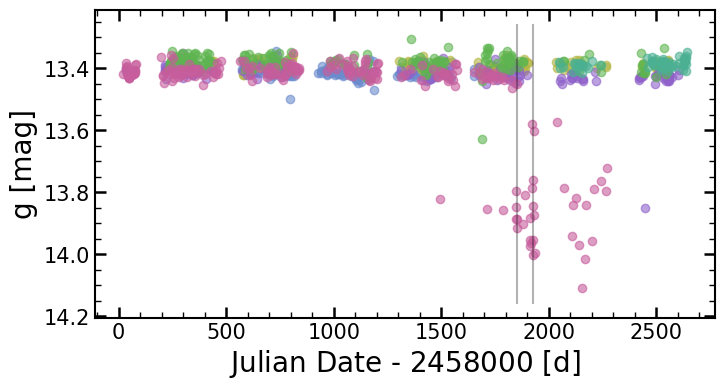

In [14]:
fig, ax = plt.subplots(1, 1, figsize=(8, 4))
ax = plotparams(ax)

cams = dfg3["Camera"]
camtype = np.unique(cams)
camnum = len(camtype)
    
camdf = pd.DataFrame()

for i in range(0,camnum):
    camdf = dfg3.loc[dfg3["Camera"] == camtype[i]].reset_index(drop=True)
    camjd = camdf["JD"] - (2.458 * 10 **6)
    cammag = camdf['Mag']
    ax.scatter(camjd, cammag, color = colors[i], alpha = 0.6)

for i in range(len(peak3)):
    ax.vlines((dfg3.JD[peak3[i]] - (2.458 * 10**6)), (min(dfg3['Mag']-0.05)), (max(dfg3['Mag'])+0.05), "k", alpha=0.3)

ax.invert_yaxis() 
ax.set_xlabel('Julian Date - $2458000$ [d]', fontsize=20)
ax.set_ylabel('g [mag]', fontsize=20)
plt.show() 

In [15]:
df4 = pd.read_csv('Updated_LC_data/412317471899.csv')
#df4 = df4.loc[df4.Mag < 15].reset_index(drop=True)
dfg4 = df4.loc[df4.Filter == 'g'].reset_index(drop=True)
dfv4 = df4.loc[df4.Filter == 'V'].reset_index(drop=True)

dfg4['Mag'] = dfg4['Mag'].astype(float)
dfg4['JD'] = dfg4['JD'].astype(float)

meanmag4 = sum(dfg4.Mag) / len(dfg4.Mag)

dfg_mag_avg4 = [i - meanmag4 for i in dfg4.Mag]

peaks4 = scipy.signal.find_peaks(dfg_mag_avg4, prominence=0.17, distance=25, height=0.3, width=2) 

peak4 = peaks4[0]

peak4 = [int(i) for i in peak4]

peak4 = pd.Series(peak4)

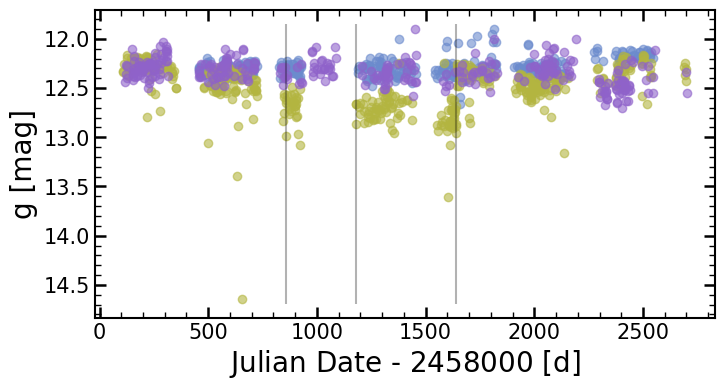

In [16]:
fig, ax = plt.subplots(1, 1, figsize=(8, 4))
ax = plotparams(ax)

cams = dfg4["Camera"]
camtype = np.unique(cams)
camnum = len(camtype)
    
camdf = pd.DataFrame()

for i in range(0,camnum):
    camdf = dfg4.loc[dfg4["Camera"] == camtype[i]].reset_index(drop=True)
    camjd = camdf["JD"] - (2.458 * 10 **6)
    cammag = camdf['Mag']
    ax.scatter(camjd, cammag, color = colors[i], alpha = 0.6)

for i in range(len(peak4)):
    ax.vlines((dfg4.JD[peak4[i]] - (2.458 * 10**6)), (min(dfg4['Mag']-0.05)), (max(dfg4['Mag'])+0.05), "k", alpha=0.3)

ax.invert_yaxis() 
ax.set_xlabel('Julian Date - $2458000$ [d]', fontsize=20)
ax.set_ylabel('g [mag]', fontsize=20)
plt.show() 

In [17]:
def year_to_jd(year):
    jd_epoch = 2449718.5 - (2.458 * 10 **6)
    year_epoch = 1995
    days_in_year = 365.25
    return (year-year_epoch)*days_in_year + jd_epoch-2450000

In [18]:
def jd_to_year(jd):
    jd_epoch = 2449718.5 - (2.458 * 10 **6)
    year_epoch = 1995
    days_in_year = 365.25
    return year_epoch + (jd - jd_epoch) / days_in_year

Text(0.08, 0.5, 'g [mag]')

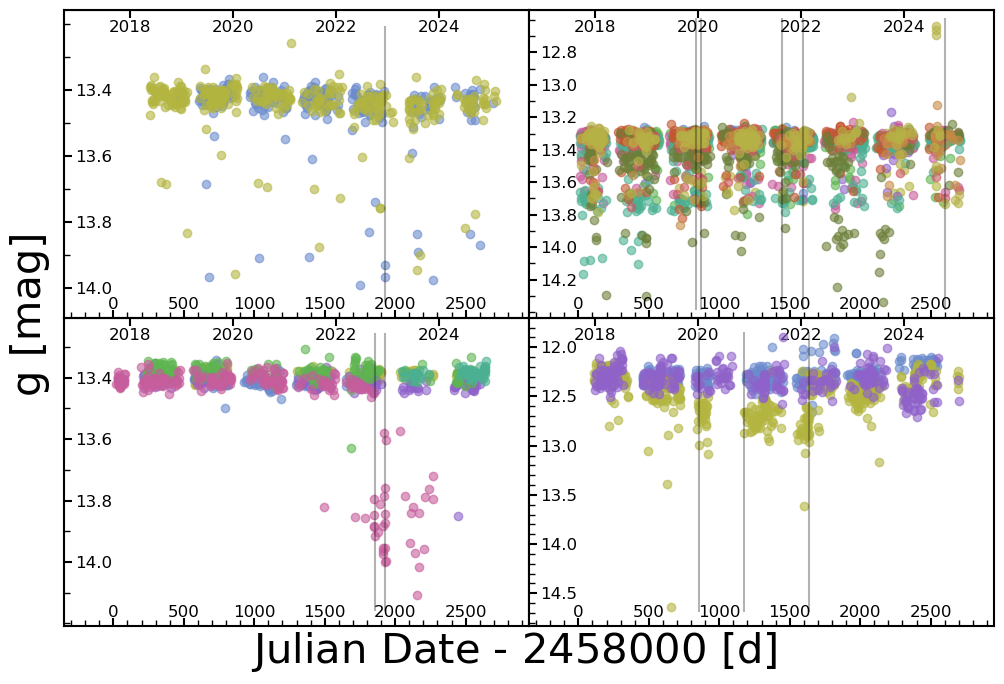

In [23]:
fig = plt.figure(figsize=(12,8))
gs = fig.add_gridspec(2,2,hspace=0,wspace=0)
ax = gs.subplots(sharex=True,sharey=False)

padnum = -40

titlesize = 15

# Subfig 1
cams = dfg1["Camera"]
camtype = np.unique(cams)
camnum = len(camtype)
    
camdf = pd.DataFrame()

for i in range(0,camnum):
    camdf = dfg1.loc[dfg1["Camera"] == camtype[i]].reset_index(drop=True)
    camjd = camdf["JD"] - (2.458 * 10 **6)
    cammag = camdf['Mag']
    ax[0,0].scatter(camjd, cammag, color = colors[i], alpha = 0.6)

for i in range(len(peak1)):
    ax[0,0].vlines((dfg1.JD[peak1[i]] - (2.458 * 10**6)), (min(dfg1['Mag']-0.05)), (max(dfg1['Mag'])+0.05), "k", alpha=0.3)

ax[0,0].set_xlim(-350,2950)
ax[0,0].set_ylim((min(dfg1['Mag'])-0.1),(max(dfg1['Mag'])+0.1))
ax[0,0].set_yticks(np.linspace(13.4, 14, 4))

# Subfig 2
cams = dfg2["Camera"]
camtype = np.unique(cams)
camnum = len(camtype)
    
camdf = pd.DataFrame()

for i in range(0,camnum):
    camdf = dfg2.loc[dfg2["Camera"] == camtype[i]].reset_index(drop=True)
    camjd = camdf["JD"] - (2.458 * 10 **6)
    cammag = camdf['Mag']
    ax[0,1].scatter(camjd, cammag, color = colors[i], alpha = 0.6)

for i in range(len(peak2)):
    ax[0,1].vlines((dfg2.JD[peak2[i]] - (2.458 * 10**6)), (min(dfg2['Mag']-0.05)), (max(dfg2['Mag'])+0.05), "k", alpha=0.3)

ax[0,1].set_ylim((min(dfg2['Mag'])-0.1),(max(dfg2['Mag'])+0.1))
ax[0,1].set_yticks(np.linspace(12.8, 14.2, 8))

# Subfig 3
cams = dfg3["Camera"]
camtype = np.unique(cams)
camnum = len(camtype)
    
camdf = pd.DataFrame()

for i in range(0,camnum):
    camdf = dfg3.loc[dfg3["Camera"] == camtype[i]].reset_index(drop=True)
    camjd = camdf["JD"] - (2.458 * 10 **6)
    cammag = camdf['Mag']
    ax[1,0].scatter(camjd, cammag, color = colors[i], alpha = 0.6)

for i in range(len(peak3)):
    ax[1,0].vlines((dfg3.JD[peak3[i]] - (2.458 * 10**6)), (min(dfg3['Mag']-0.05)), (max(dfg3['Mag'])+0.05), "k", alpha=0.3)

ax[1,0].set_ylim((min(dfg3['Mag'])-0.1),(max(dfg3['Mag'])+0.1))
ax[1,0].set_yticks(np.linspace(13.4, 14, 4))

# Subfig 4
cams = dfg4["Camera"]
camtype = np.unique(cams)
camnum = len(camtype)
    
camdf = pd.DataFrame()

for i in range(0,camnum):
    camdf = dfg4.loc[dfg4["Camera"] == camtype[i]].reset_index(drop=True)
    camjd = camdf["JD"] - (2.458 * 10 **6)
    cammag = camdf['Mag']
    ax[1,1].scatter(camjd, cammag, color = colors[i], alpha = 0.6)

for i in range(len(peak4)):
    ax[1,1].vlines((dfg4.JD[peak4[i]] - (2.458 * 10**6)), (min(dfg4['Mag']-0.05)), (max(dfg4['Mag'])+0.05), "k", alpha=0.3)

for axe in ax.flatten():
    axe.invert_yaxis()
    axe.minorticks_on()
    axe.tick_params(axis='x', direction='in', top=False, labelbottom=True, bottom=True, pad=-15, labelsize=12)
    axe.tick_params(axis='y', direction='in', right=False, pad=-35, labelsize=12)
    axe.tick_params('both', length=6, width=1.5, which='major')
    axe.tick_params('both', direction='in', length=4, width=1, which='minor')
    axe.yaxis.set_minor_locator(tick.MultipleLocator(0.1))
    secax = axe.secondary_xaxis('top', functions=(jd_to_year,year_to_jd))
    secax.xaxis.set_tick_params(direction='in', labelsize=12, pad=-18, length=6, width=1.5) 
    for axis in ['top', 'bottom', 'left', 'right']:
        axe.spines[axis].set_linewidth(1.5)

fig.supxlabel('Julian Date - $2458000$ [d]', fontsize=30, y=0.05)
fig.supylabel('g [mag]', fontsize=30, x=0.08)